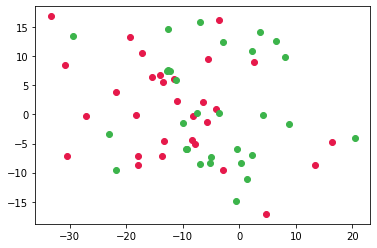

[[-12.66956502   7.59829899]
 [ -5.78780213  -1.30008784]
 [  4.21460629  -0.17623595]
 [  1.37433632 -11.09128805]
 [ -6.97451949  15.88717498]
 [-21.80769875  -9.59937346]
 [  3.5848222   14.15982675]
 [-12.23607851   7.45488545]
 [  8.00697705   9.84320934]
 [-17.31201216  10.61977909]
 [-14.04394493   6.72690306]
 [-27.22021954  -0.35257771]
 [ -6.35331546   2.18354632]
 [ -7.57472922   0.22125405]
 [  6.51143003  12.5766984 ]
 [ -7.8627622   -5.00466719]
 [  2.23757472  -6.97044646]
 [ -9.90266513  -1.4257489 ]
 [-19.2661343   13.25354216]
 [-18.27508156  -0.10961079]
 [-11.17543004   5.8598802 ]
 [ -4.97410485  -7.30632064]
 [  2.22256928  10.88014796]
 [-11.01913      2.3831913 ]
 [-29.50147007  13.40746006]
 [ -4.0988297    0.90970594]
 [ -0.44769111  -5.95600408]
 [-30.88719503   8.44497883]
 [ -8.27702376  -0.19593128]
 [-30.49768308  -7.21583112]
 [-12.79471321   7.4971257 ]
 [-17.95473327  -7.14337991]
 [ 16.36199875  -4.72793455]
 [  4.74377081 -17.08416521]
 [-13.62260435

In [31]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import sklearn.datasets
import sys
sys.path.append('..')
from utils import get_classification_data, show_data, visualise_predictions, colors

m = 60
n_features = 2
n_classes = 2
X, Y = get_classification_data(sd=10, m=60, n_clusters=n_classes, n_features=n_features)
show_data(X, Y)
print(X, Y)

In [37]:
class classificationTree:
    def __init__(self,max_depth):
        self.max_depth = max_depth

    def predict(self, X, y):
        
        # define functions
        def fit(X, y):
            X = np.sort(X) # sort the data
            best_feature, best_splitpoint = find_best_split(X, y)
            return best_feature, best_splitpoint
        
        def find_best_split(X, y):
            best_feature_idx = 0
            best_impurity = 1
            splitPoint = 0
            for feature_idx, examples in enumerate(X.T): # loop through each feature
                current_impurity, current_splitpoint = find_best_split_on_feature(examples, y)
                # if this impurity is less than previous impurity, update best impurity, feature, and split point
                if current_impurity < best_impurity:
                    impurity = current_impurity
                    best_feature_idx = feature_idx
                    splitPoint = current_splitpoint
            return best_feature_idx, splitPoint
        
        def find_best_split_on_feature(x, y): # takes in a list of examples for one feature
            best_impurity = 1
            best_split_point = 0
            for i in range(len(x) - 1): # loop through Xs until X-1
                splitPoint = np.mean((x[i], x[i+1]))
                current_impurity = getImpurity(splitPoint, x, y)
                # if this impurity is less the previous impurity, update best impurity and best split point
                if current_impurity < best_impurity:
                    best_impurity = current_impurity
                    best_split_point = splitPoint
            return best_impurity, best_split_point

        
        def getImpurity(split_point, x, y): # get the impurity
            left_labels = y[x < split_point]
            right_labels = y[x > split_point]
            p_squared = 0

            # run gini impurity for left side 
            for _class in np.unique(y): # gini_impurity_per_region()
                class_count = np.count_nonzero(left_labels == _class) 
                p_squared += (class_count/len(left_labels))**2
            left_side_impurity = 1 - p_squared

            # run gini impurity for right side
            p_squared = 0
            for _class in np.unique(y): # gini_impurity_per_region()
                class_count = np.count_nonzero(right_labels == _class) 
                p_squared += (class_count/len(right_labels))**2
            right_side_impurity = 1 - p_squared

            # return total gini impurity
            proportion_left = len(left_labels) / len(x)
            proportion_right = len(right_labels) / len(x)
            impurity = proportion_left * left_side_impurity + proportion_right * right_side_impurity
            return impurity 
            
        # run fit until max depth is reached
        for depth in range(self.max_depth):
            best_feature, best_splitpoint = fit(X, y)    
        
        return best_feature, best_splitpoint

    

In [53]:
model = classificationTree(1)
print(model.predict(X,Y))

(1, 7.1585829995657155)
